In [22]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
from matplotlib import cm
from xgcm import Grid

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [23]:
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/
forcing=xr.open_dataset('NW2_forcing.nc', decode_times=False) #This is for the 1/8 degree case
taux = forcing.taux[0,:,:]


#1/4 degree resolution, surface diagnostics are for uppermost 5 meters.
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix5/
fs025 = xr.open_dataset('static.nc', decode_times=False)
os025 = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc'], decode_times=False)
av025 = xr.open_dataset('averages_00031502.nc', decode_times=False)  


#1/32 degree resolution, surface diagnostics are for uppermost 5 meters.
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5
fs003125 = xr.open_dataset('static.nc', decode_times=False)
os003125 = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc','sub03/ocean.stats.nc','sub04/ocean.stats.nc',
                        'sub05/ocean.stats.nc','sub06/ocean.stats.nc','sub07/ocean.stats.nc','sub08/ocean.stats.nc'], decode_times=False)
#av003125 = xr.open_dataset('averages_00002702.nc', decode_times=False)  #20 5-day averages
av003125 = xr.open_mfdataset(['averages_00002302.nc','averages_00002402.nc','averages_00002502.nc','averages_00002602.nc','averages_00002702.nc'], decode_times=False)  #20 5-day averages

%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis
/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.25deg_N15_baseline_hmix5
/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.03125deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


## 1/4 Degree case zonally averaged density structure:

In [24]:
#Alongshore averages
Layer = np.array(os025['Layer']);
Layermat=np.tile(Layer,[len(av025.yh),1]);   Layermat=np.moveaxis(Layermat, [0, 1], [1, 0])
Interface = np.array(os025['Interface']);    drho=np.diff(Interface)
drhomat=np.tile(drho,[len(av025.yh),1]);     drhomat =np.moveaxis(drhomat, [0, 1], [1,0])

h = np.nanmean(np.nanmean(np.array(av025['h'][:,:,:,:]),axis=0),axis=2);
eta_025 = np.zeros((len(Layer)+1,len(av025.yh)));

for i in range(1,len(Layer)+1):
    eta_025[i,:]=np.nansum(h[0:i,:],axis=0)

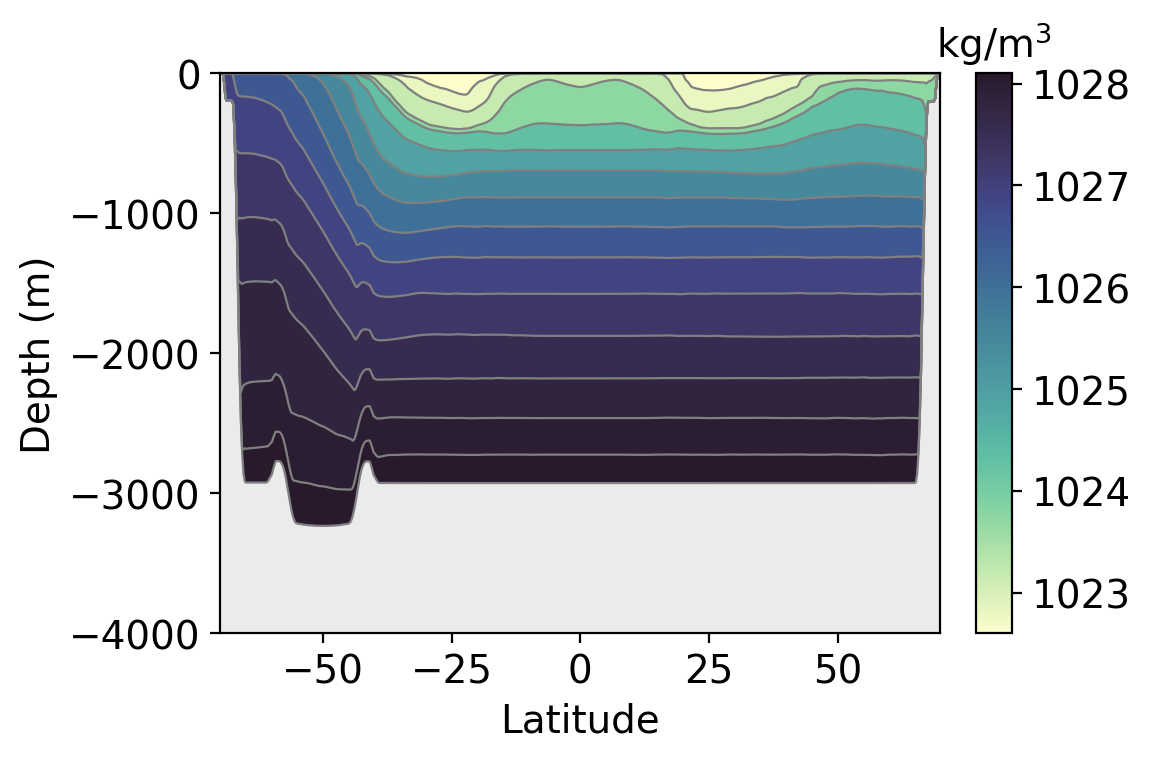

In [25]:
fig = plt.figure(figsize=(6, 4), dpi= 200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Latitude',fontsize=14)
ax1.set_ylabel('Depth (m)',fontsize=14)
ax1.tick_params(labelsize=14); 
ax2.set_title('kg/m$^3$',fontsize=14); ax2.tick_params(labelsize=14)
ax1.set_ylim([-4000,0])

plotted =ax1.pcolor(av025.yh,-eta_025,np.array(Layermat),cmap=cmocean.cm.deep)
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
for i in range(1,len(Layer)+1,1):
    line,=ax1.plot(av025.yh,-eta_025[i,:],color=[0.5,0.5,0.5],linewidth=.8) #Plot the individual layer positions, don't do this for alongshore average

plt.show()

## 1/32 Degree case zonally averaged density structure:

In [26]:
#Alongshore averages
Layer = np.array(os003125['Layer']);
Layermat=np.tile(Layer,[len(av003125.yh),1]);   Layermat=np.moveaxis(Layermat, [0, 1], [1, 0])
Interface = np.array(os003125['Interface']);    drho=np.diff(Interface)
drhomat=np.tile(drho,[len(av003125.yh),1]);     drhomat =np.moveaxis(drhomat, [0, 1], [1,0])

h = np.nanmean(np.nanmean(np.array(av003125['h'][:,:,:,:]),axis=0),axis=2);
eta_003125 = np.zeros((len(Layer)+1,len(av003125.yh)));

for i in range(1,len(Layer)+1):
    eta_003125[i,:]=np.nansum(h[0:i,:],axis=0)

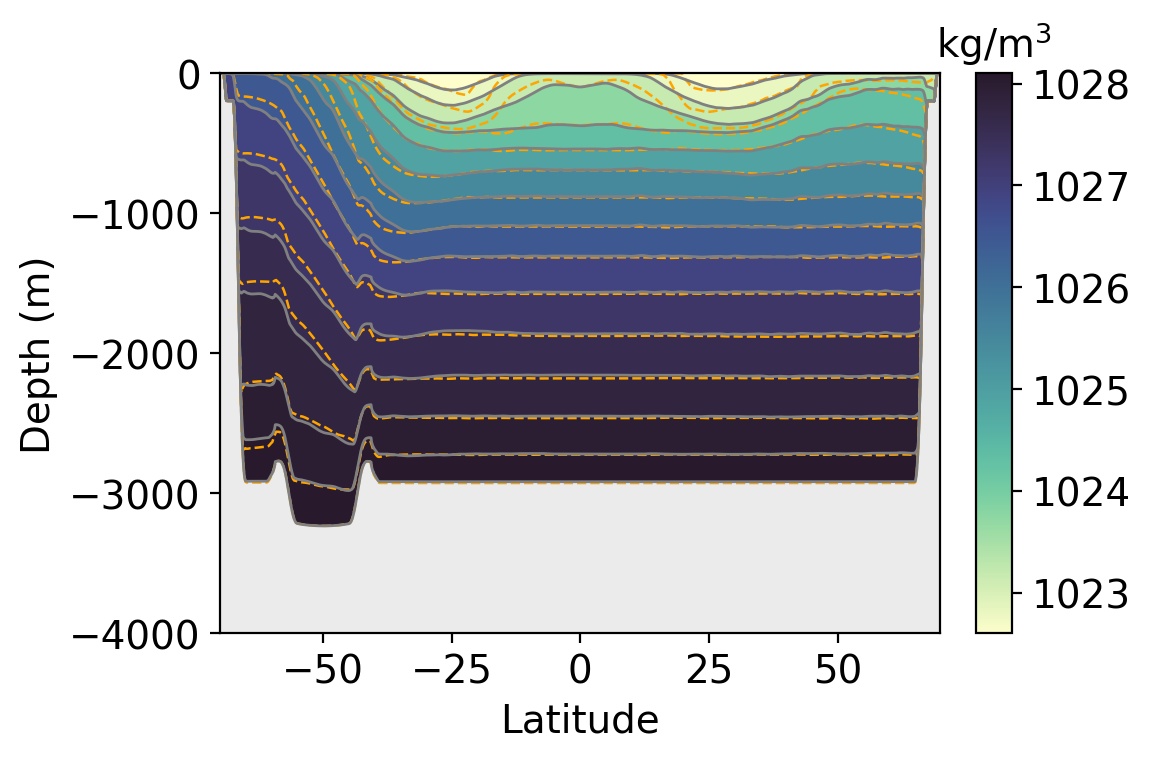

In [43]:
fig = plt.figure(figsize=(6, 4), dpi= 200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Latitude',fontsize=14)
ax1.set_ylabel('Depth (m)',fontsize=14)
ax1.tick_params(labelsize=14); 
ax2.set_title('kg/m$^3$',fontsize=14); ax2.tick_params(labelsize=14)
ax1.set_ylim([-4000,0])

plotted =ax1.pcolor(av003125.yh,-eta_003125,np.array(Layermat),cmap=cmocean.cm.deep)
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
for i in range(1,len(Layer)+1,1):
    line,=ax1.plot(av025.yh,-eta_025[i,:],'--',color='#FFA500',linewidth=.9) 
    line,=ax1.plot(av003125.yh,-eta_003125[i,:],color=[0.5,0.5,0.5],linewidth=1) 

plt.show()

## 1/4 Degree ACC Transect:

In [31]:
index=80 #80 (50S) for 1/4 degree
Layer = np.array(os025['Layer']);
Layermat=np.tile(Layer,[len(av025.xh),1]);  Layermat=np.moveaxis(Layermat, [0, 1], [1, 0])
Interface = np.array(os025['Interface']);   drho=np.diff(Interface)
drhomat=np.tile(drho,[len(av025.xh),1]);    drhomat =np.moveaxis(drhomat, [0, 1], [1,0])

v = np.nanmean(np.array(av025['v'][:,:,index,:]),axis=0); v=(v[:,:-1]+v[:,1:])/2
h = np.nanmean(np.array(av025['h'][:,:,index,:]),axis=0); 
eta = np.zeros((len(Layer)+1,len(av025.xh)));

for i in range(1,len(Layer)+1):
    eta[i,:]=np.nansum(h[0:i,:],axis=0)


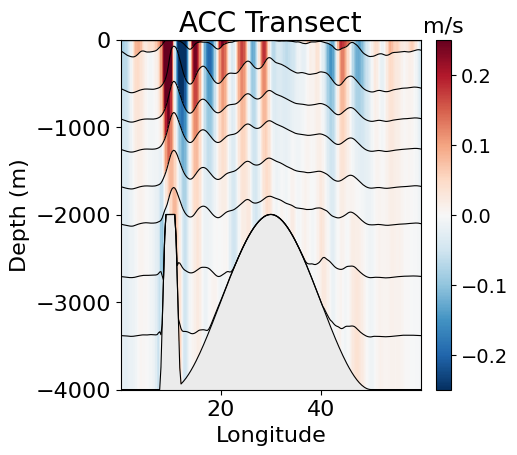

In [35]:
fig = plt.figure(figsize=(5, 5), dpi= 100, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Depth (m)',fontsize=16)
#ax1.set_yticklabels('')
ax1.tick_params(labelsize=16); 
ax2.set_title('m/s',fontsize=16); 
ax2.tick_params(labelsize=14)
ax1.set_ylim([-4000,0])
ax1.set_title('ACC Transect',fontsize=20)

plotted =ax1.pcolor(av025.xh,-eta,v,cmap='RdBu_r',vmin=-0.25,vmax=0.25)
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
for i in range(1,len(Layer)+1,1):
    line,=ax1.plot(av025.xh,-eta[i,:],color='k',linewidth=.8) #Plot the individual layer positions, don't do this for alongshore average
plt.show()


## 1/32 Degree ACC Transect:

In [28]:
index=640 #640 (50S) for 1/32 degree
Layer = np.array(os003125['Layer']);
Layermat=np.tile(Layer,[len(av003125.xh),1]);  Layermat=np.moveaxis(Layermat, [0, 1], [1, 0])
Interface = np.array(os003125['Interface']);   drho=np.diff(Interface)
drhomat=np.tile(drho,[len(av003125.xh),1]);    drhomat =np.moveaxis(drhomat, [0, 1], [1,0])

v = np.nanmean(np.array(av003125['v'][:,:,index,:]),axis=0); v=(v[:,:-1]+v[:,1:])/2
h = np.nanmean(np.array(av003125['h'][:,:,index,:]),axis=0); 
eta = np.zeros((len(Layer)+1,len(av003125.xh)));

for i in range(1,len(Layer)+1):
    eta[i,:]=np.nansum(h[0:i,:],axis=0)


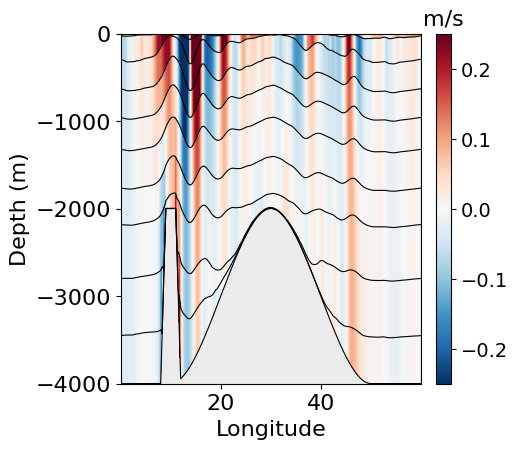

In [29]:
fig = plt.figure(figsize=(5, 5), dpi= 100, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Depth (m)',fontsize=16)
#ax1.set_yticklabels('')
ax1.tick_params(labelsize=16); 
ax2.set_title('m/s',fontsize=16); 
ax2.tick_params(labelsize=14)
ax1.set_ylim([-4000,0])

plotted =ax1.pcolor(av003125.xh,-eta,v,cmap='RdBu_r',vmin=-0.25,vmax=0.25)
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
for i in range(1,len(Layer)+1,1):
    line,=ax1.plot(av003125.xh,-eta[i,:],color='k',linewidth=.8) #Plot the individual layer positions, don't do this for alongshore average

plt.show()

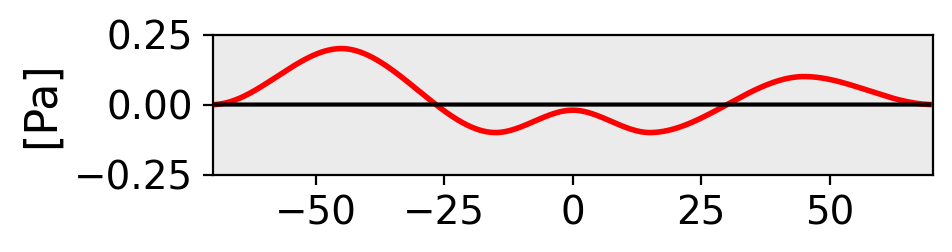

In [16]:
fig = plt.figure(figsize=(6, 1), dpi= 200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax1.set_facecolor((0.92, 0.92, 0.92))
#ax1.set_xlabel('Latitude',fontsize=14)
#ax1.set_ylabel('Depth (m)',fontsize=14)
#ax1.tick_params(labelsize=14); 
#ax1.set_ylim([-4000,0])



#ax1.set_title('Zonal Wind Stress',fontsize=16)
ax1.set_ylabel('[Pa]',fontsize=16)

ax1.tick_params(labelsize=14); 
ax1.set_ylim([-0.25,.25])
ax1.set_xlim([-70,70])
plotted =ax1.plot(taux.yh,taux[:,100],'r',linewidth=2)
plotted =ax1.plot(taux.yh,taux[:,100]*0,'k')
